# Denoising using CuDnn
It is just to test that our neural network learn something relevant

In [1]:
import numpy as np
import tensorflow as tf
from model import denoiser
from utils_train import *
import scipy
import scipy.misc
import matplotlib.pyplot as plt
import imz2mat
import utils
%matplotlib inline




imz2mat : version Septembre 2017
Dans ximaread : image monocanal
Dans ximaread : lecture du canal 0/1
image en .imf
image en .imf
('image en float', 1024, ' ', 1024, '  canaux:', 1, ' verif : ', 0)
('lecture de ', 'data/PileSaintGervais_moyennearithmetique.imf', ' en quelconque', 1024, 1024, 1, ' offset ', 0, '>f', 4, ' complex', 0, 'blocksize', 4194304)
Données réelles. Nouvelle version de imz2mat  >f


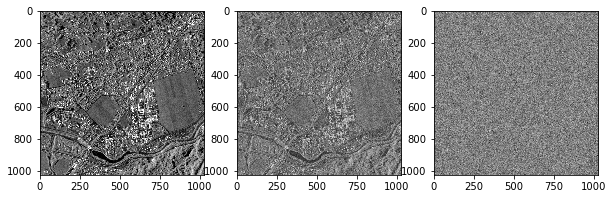

In [2]:
# First we load the image
img_gt = utils.robust_scale(imz2mat.imz2mat('data/PileSaintGervais_moyennearithmetique.imf')[0]).astype(np.float32)
#img_gt = scipy.misc.imread('data/test/Set12/05.png').astype(np.float32)
img_noise = (img_gt + 25 * np.random.randn(img_gt.shape[0], img_gt.shape[1]))/255
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img_gt, cmap='gray')
plt.subplot(132)
plt.imshow(img_noise, cmap='gray')
plt.subplot(133)
plt.imshow(img_noise*255-img_gt, cmap='gray')


[*] Initialize model successfully...
[*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from ./checkpoint_sar/DnCNN-tensorflow-50650


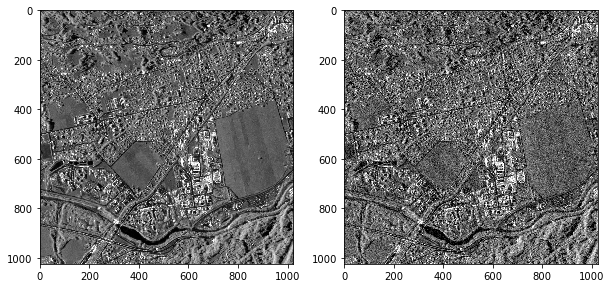

In [3]:
# We run the session and make a forward
ckpt_dir = "./checkpoint_sar"

sess = tf.Session()
 
model = denoiser(sess, sigma=25, add_noise=False)
model.load(ckpt_dir)
img_input = img_noise.reshape(1, img_gt.shape[1], img_gt.shape[0],1)
denoised, noisy_img, psnr = model.denoise(img_input)

out = np.clip(255*denoised.reshape(img_gt.shape),0,255).astype(np.uint8)
noisy = np.clip(255*noisy_img.reshape(img_gt.shape),0,255).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(out, cmap='gray')
plt.subplot(122)
plt.imshow(noisy, cmap='gray')

sess.close()

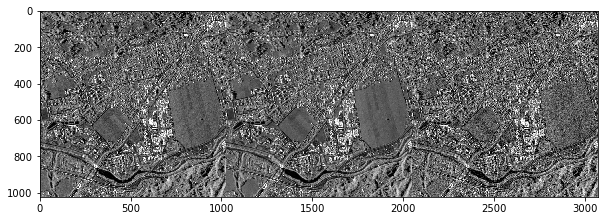

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(np.hstack((img_gt, out, noisy)), cmap='gray')


(98.265488, 47.790672, 97.728588104248047, 45.814988564508987)
25.5171110853


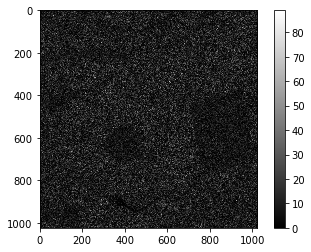

In [5]:
print(img_gt.mean(),img_gt.std(), out.mean(), out.std())
print(cal_psnr(img_gt, out))
plt.imshow(np.abs(img_gt-out), cmap ='gray')
plt.colorbar()

In [6]:
# trained with natural images : PSNR : 25.2964
# trained with sar images